# Pandas overview

## Introduction to Pandas

In [3]:
import pandas as pd

# Création d'une série avec pandas
counts = pd.Series([632, 1638, 569, 115], index=['Firmicutes', 'Proteobacteria', 'Actinobacteria', 'Bacteroidetes'])
print(counts)  # Affichage de la série

# Filtrage par nom d'index qui se termine par 'bacteria'
filtered_bacteria = counts[[name.endswith('bacteria') for name in counts.index]]
print(filtered_bacteria)

# Filtrage des valeurs supérieures à 1000
high_counts = counts[counts > 1000]
print(high_counts)

# Lecture avec condition sous forme de série booléenne
condition = counts > 500
print(counts[condition])

# Création d'une série à partir d'un dictionnaire
data_dict = {'Firmicutes': 632, 'Proteobacteria': 1638}
series_from_dict = pd.Series(data_dict)
print(series_from_dict)

# Identification des valeurs manquantes
is_null = series_from_dict.isnull()
print(is_null)

# Alignement de deux séries par addition
series1 = pd.Series([1, 2, 3], index=['a', 'b', 'c'])
series2 = pd.Series([4, 5, 6], index=['a', 'b', 'c'])
aligned_series = series1 + series2
print(aligned_series)


Firmicutes         632
Proteobacteria    1638
Actinobacteria     569
Bacteroidetes      115
dtype: int64
Proteobacteria    1638
Actinobacteria     569
dtype: int64
Proteobacteria    1638
dtype: int64
Firmicutes         632
Proteobacteria    1638
Actinobacteria     569
dtype: int64
Firmicutes         632
Proteobacteria    1638
dtype: int64
Firmicutes        False
Proteobacteria    False
dtype: bool
a    5
b    7
c    9
dtype: int64


In [2]:
import pandas as pd

data = pd.DataFrame({'value':[632, 1638, 569, 115, 433, 1130, 754, 555],
                     'patient':[1, 1, 1, 1, 2, 2, 2, 2],
                     'phylum':['Firmicutes', 'Proteobacteria', 'Actinobacteria', 
    'Bacteroidetes', 'Firmicutes', 'Proteobacteria', 'Actinobacteria', 'Bacteroidetes']})
print(data)

data[['phylum','value','patient']] # ordre des colonnes
data.index # index des lignes
data['patient'] # colonne patient
data.patient # colonne patient
data.loc[3] # acceder à la ligne 3
data.shape[0] # dimension de la colonne 0
vals = data.value # valeurs de la colonne value qui est une serie pandas
vals[5] = 0 # changer la valeur de la 5eme ligne
# Attention: cela modifie le DataFrame original
data_copy = data.value.copy()
data.value[[3,4,6]] = [14, 21, 5] # changer les valeurs des lignes 3, 4 et 6 de la colonne value
data['year'] = 2013 # ajouter une colonne year
data.treatment = 1 # n'ajoute pas de colonne treatment

#La méthode .apply de Pandas est utilisée pour appliquer une fonction à chaque élément d'une série ou d'un DataFrame & x est une ligne
print(data[data['phylum'].apply(lambda x: x.endswith('bacteria')) & data['value'].apply(lambda x: x > 1000)])

data_nomonth = data.drop('treatment', axis=1) # supprimer la colonne "treatment"
data2 = data.drop([0,1]) # supprimer les lignes 0 et 1
data.nlargest(3,"Value") # les 3 lignes avec les valeurs les plus grandes

   value  patient          phylum  year
1   1638        1  Proteobacteria  2013


/var/folders/w1/f3785wtj77166md17d9fj02w0000gn/T/ipykernel_28276/2225023308.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vals[5] = 0 # changer la valeur de la 5eme ligne
/var/folders/w1/f3785wtj77166md17d9fj02w0000gn/T/ipykernel_28276/2225023308.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.value[[3,4,6]] = [14, 21, 5] # changer les valeurs des lignes 3, 4 et 6 de la colonne value


NumPy's math functions and other operations can be applied to Series without losing the data structure.
np.log(bacteria)
bacteria.apply(np.log)

## Importation data

### CSV

In [ ]:
!head Data/microbiome.csv # afficher les 10 premières lignes du fichier microbiome.csv
mb = pd.read_csv("Data/microbiome.csv", sep=',') # lire le fichier microbiome.csv parfois sep='\s+'
mb.head() # afficher les 5 premières lignes du DataFrame mb
#We can override default behavior by customizing some the arguments, like `header`, `names` or `index_col`.
pd.read_csv("Data/microbiome.csv", skiprows=[3,4,6]) # Enleve les lignes 3, 4 et 6
pd.read_csv("Data/microbiome.csv", nrows=4) # Ne prend que les 4 premières lignes
#Parfois des valeurs manquent dans les données. Panda les remplace par NaN.
pd.isnull(pd.read_csv("Data/microbiome_missing.csv")) # Affiche true si la valeur est manquante
valeurs_marquante = pd.read_csv("Data/microbiome_missing.csv", na_values=['?', -99999]) # Remplace les valeurs manquantes par NaN





### Excel

In [ ]:
mb = pd.read_excel('Data/microbiome_MID2.xls', sheet_name='Sheet 1', header=None)
mb.head()


#### pickel (binary)

In [ ]:
pd.read_pickle("data_pickle") # lire un fichier pickle

### indexing and selection

In [ ]:
baseball = pd.read_csv("Data/baseball.csv", index_col='id')
baseball.index.is_unique # Vérifie si l'index est unique
baseball.index = baseball.player # Change l'index en player
baseball['womacto01CHN2006':'gonzalu01ARI2006'] # Affiche les lignes de womacto01CHN2006 à gonzalu01ARI2006
min_ab = 500
baseball.query("ab > @min_ab") # Affiche les lignes où ab > 500 (il faut mettre une chaine de caractère)
#iloc permet de sélectionner des lignes et des colonnes par position
baseball.iloc[:5, 5:8] # Affiche les lignes de 0 à 5 et les colonnes de 5 à 8
baseball_h = baseball.set_index(['year', 'team', 'player']) #indxexation hiérarchique à partir de plusieurs colonnes
baseball_h.loc[(2007, 'ATL', 'francju01')] # Accès à une ligne dun DataFrame hiérarchique


### Operation & Sorting


In [ ]:
hr_total = baseball
hr_total[hr_total.notnull()] # Affiche les lignes où il n'y a pas de valeurs manquantes
hr_total.dropna() # Enlève les lignes où il y a des valeurs manquantes
hr_total.dropna(how='all') # which only drops a row when every field is a missing value.
hr_total.fillna(0) # Remplace les valeurs manquantes par 0
data.fillna({'year': 2013, 'treatment':2}) # Remplace les valeurs manquantes de year par 2013 et treatment par 2

data['treatment'].fillna(2, inplace=True) #inplace=True : Modifie l'objet d'origine directement. Aucun nouvel objet n'est retourné. // inplace=False : Crée et retourne une nouvelle copie de l'objet avec les modifications, laissant l'objet d'origine inchangé.
baseball.sum(numeric_only=True) # retourne la somme de chaque colonne. numeric_only=True : ignore les colonnes avec des chaines de caractères
baseball.mean(skipna=False) # retourne la moyenne de chaque colonne. skipna=False : inclut les valeurs manquantes
baseball.describe() # retourne des statistiques descriptives pour chaque colonne (pour series et DataFrame)


We can also calculate summary statistics *across* multiple columns, for example, correlation and covariance.

$$cov(x,y) = \sum_i (x_i - \bar{x})(y_i - \bar{y})$$

In [ ]:
baseball.hr.cov(baseball.X2b)

69.07646464646454

$$corr(x,y) = \frac{cov(x,y)}{(n-1)s_x s_y} = \frac{\sum_i (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_i (x_i - \bar{x})^2 \sum_i (y_i - \bar{y})^2}}$$

In [ ]:
baseball.hr.corr(baseball.X2b)

0.7790615182539742

### Affichage

       hr  X2b
id            
88653  15   52
89360  35   19
89361  26   30
89371  21   28
89374  21   24
89378  25   20
89389  11   31
89396  20   33
89439  20   36
89462  30   24
89466  15   23
89481  12   15
89489  24   30
89521  28   14
89533  13   19


<Axes: xlabel='hr', ylabel='X2b'>

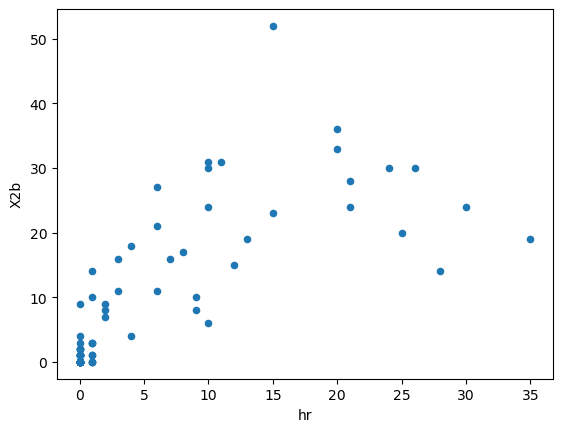

In [ ]:

baseball.plot.scatter(x='hr', y='X2b')

<Axes: >

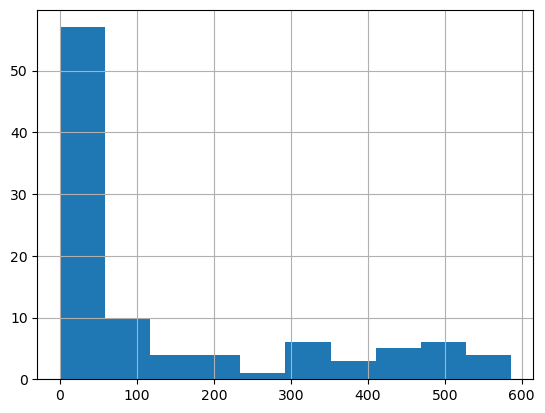

In [ ]:
baseball['ab'].hist()

### Writing Data to Files

In [ ]:
mb.to_csv("mb.csv") # Sauvegarde le DataFrame mb dans un fichier csv
baseball.to_pickle("baseball_pickle") # Sauvegarde le DataFrame baseball dans un fichier pickle

### Date/Time data handling

In [ ]:
from datetime import datetime, date, time
now = datetime.now() #return (year, month, day, hour, minute, second, microsecond)
object = date(2024) #create a date object datetime64[ns]
object.dtypes #return the type of the object
from dateutil.parser import parse 
parse("6/12/2011", dayfirst=True) #convert a string to a date object
segments = pd.read_csv("Data/transit_segments.csv", parse_dates=['st_time', 'end_time'], date_format='%m/%d/%y %H:%M', nrows=1000) 
#parse_dates : convertit les colonnes en objets datetime #date_format : format de la date
segments.st_time.dt.month==2 #return les lignes où le mois est février (=2)


### Merging and joining DataFrame objects

In [34]:
import numpy as np
import pandas as pd
df1 = pd.DataFrame({
    'id1': [1, 2, 3, 4],
    'name': ['Alice', 'Bob', 'Charlie', 'David']
})

df2 = pd.DataFrame({
    'id2': [3, 4, 5, 6],
    'score': [85, 90, 95, 100]
})
print(df1)
print(df2)
#display(pd.merge(df1, df2)) #inner join par défaut
#print(pd.merge(df1, df2, how='outer')) #outer join 
#print(pd.merge(df1, df2, how='left')) #left join
#print(pd.merge(df1, df2, how='right')) #right join
#La jointure externe ci-dessus produit l'union des deux tables, de sorte que toutes les lignes sont représentées, avec les valeurs manquantes insérées le cas échéant. On peut également effectuer des jointures droite et gauche pour inclure toutes les lignes de la table de droite ou de gauche (*c'est-à-dire* le premier ou le deuxième argument de `merge`), mais pas nécessairement l'autre.
display(pd.merge(df1, df2, left_index=True, right_index=True)) #jointure sur les index des deux DataFrames
display(pd.merge(df1, df2, left_on= 'id1', right_on='id2')) #jointure sur les colonnes id1 et id2 des deux DataFrames


   id1     name
0    1    Alice
1    2      Bob
2    3  Charlie
3    4    David
   id2  score
0    3     85
1    4     90
2    5     95
3    6    100


,id1,name,id2,score
0,1,Alice,3,85
1,2,Bob,4,90
2,3,Charlie,5,95
3,4,David,6,100


,id1,name,id2,score
0,3,Charlie,3,85
1,4,David,4,90


### Concatenate


### Pivoting

### Data transformation (values remplacement , indecator variable)


In [15]:
vessels = pd.DataFrame({'vessel': ['A', 'B', 'C', 'D'], 'type': ['ferry', 'ferry', 'ship', 'ship']})
print(vessels)
vessels.duplicated(subset='type').head(30) #return True if the row is duplicated
vessels.drop_duplicates(['type']).head() #remove the duplicated rows
vessels['type'] = vessels.type.map({'ferry': 1, 'ship': 0}) #replace the values of the column type by 1 if ferry and 0 if ship
vessels.drop(columns=['type'], axis=1) #remove the column type
print(vessels)
vessels.vessel.replace({'A': 'Alpha', 'B': 'Bravo', 'C': 'Charlie', 'D': 'Delta'}).head(10)
vessels['type'] = vessels['type'].replace({1: 'ferry', 0: 'ship'}) # replace the values back to ferry and ship
print(vessels)

#inplace=True #modifie l'objet d'origine directement. Aucun nouvel objet n'est retourné.
vessels.rename(columns={'type': 'vessel_type'}, inplace=True) #rename the column type to vessel_type




  vessel   type
0      A  ferry
1      B  ferry
2      C   ship
3      D   ship
  vessel  type
0      A     1
1      B     1
2      C     0
3      D     0
  vessel   type
0      A  ferry
1      B  ferry
2      C   ship
3      D   ship


### Caterorical data /discretization


In [ ]:
cdystonia['treat'] = cdystonia.treat.astype('category') #§change the type of the column treat to category

pd.cut(cdystonia.age, [20,30,40,50,60,70,80,90], right=False , labels=['young','middle-aged','old','really old'])
#Dans ce cas, l'appel à pd.cut(cdystonia.age, [20,30,40,50,60,70,80,90]) divise la colonne age du DataFrame cdystonia en intervalles spécifiés par la liste [20,30,40,50,60,70,80,90]. Cela signifie que les âges seront classés dans les catégories suivantes : 20-30, 30-40, 40-50, 50-60, 60-70, 70-80, et 80-90 ans. La fonction retourne une série d'objets catégoriels indiquant à quel intervalle chaque valeur appartie #right=False : les intervalles sont fermés à gauche et ouverts à droite
#labels : remplace les intervalles par les labels spécifiés
pd.qcut(cdystonia.age, 4) #A related function `qcut` uses empirical quantiles to divide the data. If, for example, we want the quartiles -- (0-25%], (25-50%], (50-70%], (75-100%] -- we can just specify 4 intervals, which will be equally-spaced by default:
quantiles = pd.qcut(segments.seg_length, [0, 0.01, 0.05, 0.95, 0.99, 1]) #retourn des divisions personnalisées


### Permutation and sampling

In [ ]:
vessels.sample(n=10) #utilise la méthode sample de la bibliothèque Pandas pour sélectionner un échantillon aléatoire de 10 lignes à partir du DataFrame

### Aggregation / groupe


In [4]:
# Exemple de DataFrame
import pandas as pd

data = pd.DataFrame({
    'team': ['A', 'A', 'B', 'B', 'C', 'C'],
    'points': [10, 15, 10, 20, 10, 30],
    'assists': [5, 7, 8, 5, 6, 9]
})

grouped_data = data.groupby('team').agg(moyenne_points=('points', 'mean'), somme_assists=('assists', 'sum')) #§group by team and calculate the mean of points and the sum of assists
display(grouped_data)

,moyenne_points,somme_assists
team,,
A,12.5,12
B,15.0,13
C,20.0,15
